# Harmonic Response Method for Solving Dynamic Heat Transfer in Walls
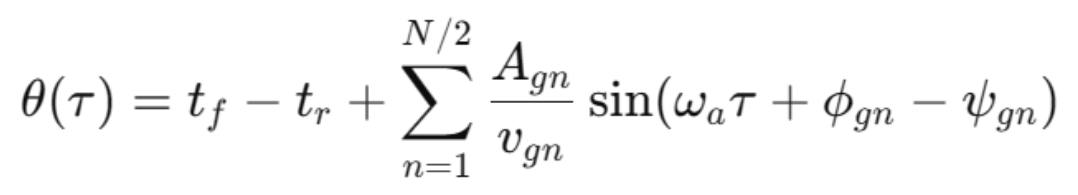

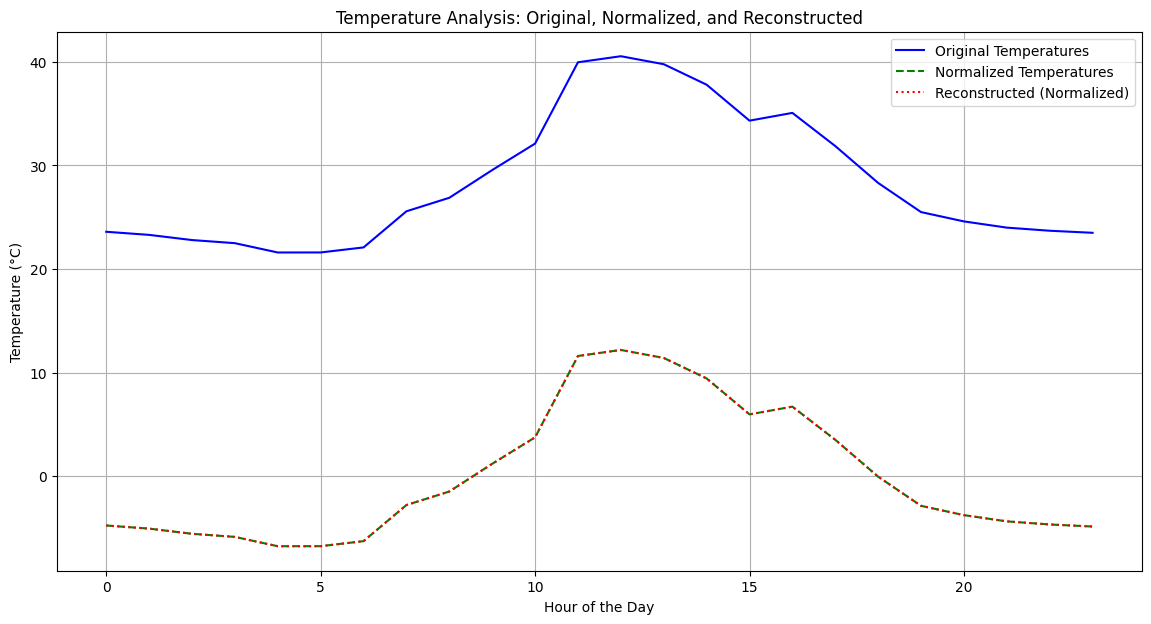

频率 (rad/s): 0.0 振幅: 1.3733905579399142 相位 (弧度): 0.0 延迟时间: 0.0
频率 (rad/s): 0.041666666666666664 振幅: 8.778430585612028 相位 (弧度): 1.876666099699306 延迟时间: 7.168336471203174
频率 (rad/s): 0.08333333333333333 振幅: 19.610300540122864 相位 (弧度): 2.8473340461613588 延迟时间: 10.876014913930252
频率 (rad/s): 0.125 振幅: 37.54287919905215 相位 (弧度): -2.714913044202783 延迟时间: -10.370203945188917
频率 (rad/s): 0.16666666666666666 振幅: 65.73430474061888 相位 (弧度): -2.117527847145465 延迟时间: -8.088360576190563
频率 (rad/s): 0.20833333333333331 振幅: 108.2929433139796 相位 (弧度): -1.5977826510485307 延迟时间: -6.103080165620317
频率 (rad/s): 0.25 振幅: 170.5512800088671 相位 (弧度): -1.1322303377759009 延迟时间: -4.324801319415383
频率 (rad/s): 0.29166666666666663 振幅: 259.3798886883339 相位 (弧度): -0.7071428557103664 延迟时间: -2.7010867430021697
频率 (rad/s): 0.3333333333333333 振幅: 383.542683052402 相位 (弧度): -0.31372342230392897 延迟时间: -1.1983352021610352
频率 (rad/s): 0.375 振幅: 554.1188806691692 相位 (弧度): 0.05405610851936147 延迟时间: 0.20647912500403906
频率 (rad/s)

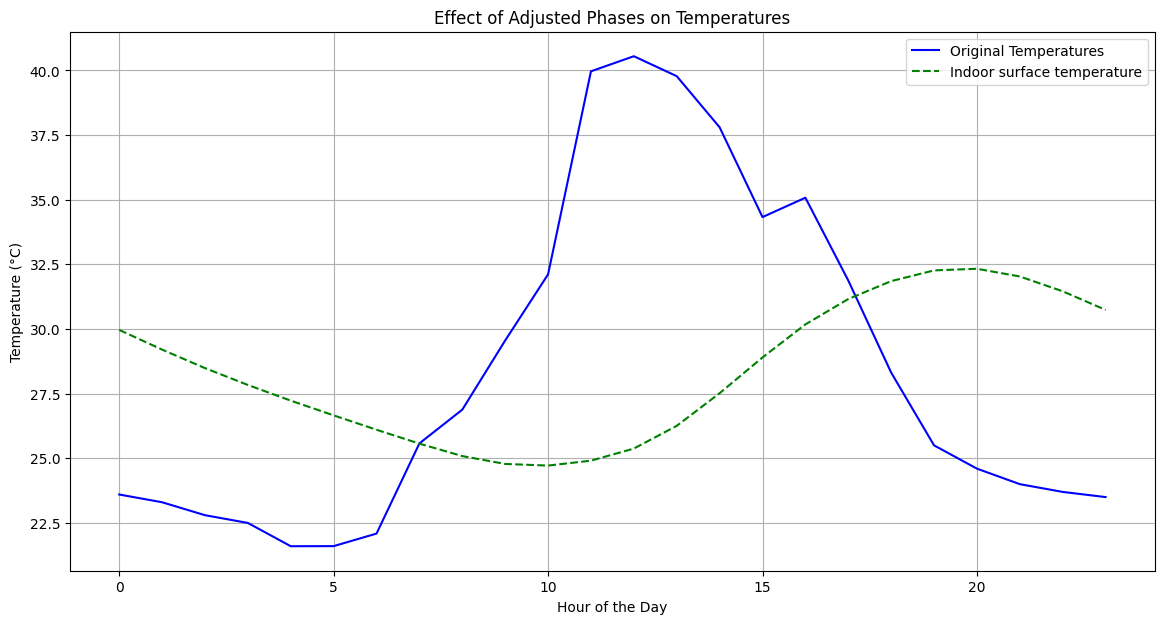

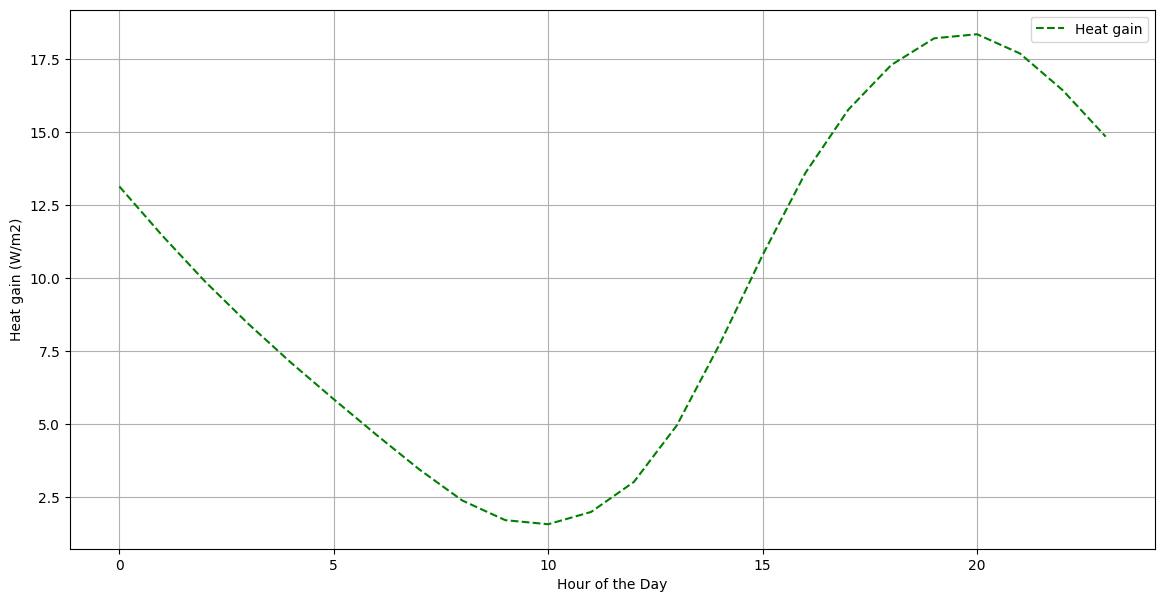

[13.13417462 11.45466848  9.88092101  8.44516898  7.11001838  5.85620446
  4.6322065   3.4494772   2.3910986   1.72081328  1.58218798  2.00155233
  3.03068612  4.96438852  7.74338952 10.78902253 13.60305654 15.76344484
 17.2882535  18.20046696 18.34008677 17.682225   16.42127091 14.83681394]
[ 0.40660246  0.21355578  0.03266526 -0.1323637  -0.28582929 -0.42994583
 -0.57063525 -0.70658115 -0.82823386 -0.90527815 -0.9212121  -0.8730093
 -0.75471806 -0.53245341 -0.21302801  0.13704475  0.46049693  0.70881743
  0.88408279  0.98893491  1.00498317  0.92936687  0.78442962  0.60230813]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 提供的温度数据
temperatures = np.array([
    23.6, 23.3, 22.8, 22.5, 21.6, 21.6036, 22.08889, 25.57658, 26.88138,
    29.55627, 32.11253, 39.96427, 40.54804, 39.77658, 37.8, 34.32742, 35.07658,
    31.87538, 28.31471, 25.5, 24.6, 24, 23.7, 23.5
])

N = len(temperatures)  # 数据点数
t = np.arange(N)  # 时间点


# 计算温度数据的平均值
mean_temperature = np.mean(temperatures)

# 从每个数据点中减去平均值
normalized_temperatures = temperatures - mean_temperature

# 使用DFT计算傅里叶系数
normalized_coefficients = np.fft.fft(normalized_temperatures)
normalized_frequencies = np.fft.fftfreq(N, d=1) * 2 * np.pi  # 转换为弧度/单位时间

# 重建信号，选择主要频率成分
normalized_reconstructed = np.zeros(N)
num_components = 24  # 我们将选择主要的五个频率成分进行重建

normalized_indices = np.argsort(np.abs(normalized_coefficients))[-num_components:]  # 挑选最大的几个系数

# 数据储存
reconstructed = np.zeros(N)
amplitudes = np.zeros(num_components)
phases = np.zeros(num_components)
adjusted_phases = np.zeros(num_components)
amplitudes_2 = np.zeros(num_components)
phases_2 = np.zeros(num_components)
delta_t_tau = np.zeros(N)

for i in normalized_indices:
    amplitude = np.abs(normalized_coefficients[i]) / N
    phase = np.angle(normalized_coefficients[i])
    adjusted_phase = phase + np.pi / 2  # 增加π/2到相位
    normalized_reconstructed += amplitude * np.sin(normalized_frequencies[i] * t + adjusted_phase)
    phases[i]=adjusted_phase
    amplitudes[i]=amplitude
    

# 绘制原始数据和重建数据
plt.figure(figsize=(14, 7))
plt.plot(t, temperatures, label='Original Temperatures', color='blue')
plt.plot(t, normalized_temperatures, label='Normalized Temperatures', color='green', linestyle='--')
plt.plot(t, normalized_reconstructed, label='Reconstructed (Normalized)', color='red', linestyle=':')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis: Original, Normalized, and Reconstructed')
plt.legend()
plt.grid(True)
plt.show()

# 进行计算
for i in range(N):  # 使用 range(N) 以便正确循环处理每个频率点
    omega = normalized_frequencies[i]
    s = 1j * omega  # 假设 s 为复数频率
    a=0.00184
    sqrt_s_a = np.sqrt(s / a)  

    # 避免分母太小
    denom = 0.81 * sqrt_s_a
    if np.abs(denom) < 1e-6:
        denom = 1e-6

    ch = np.cosh(0.24 * sqrt_s_a)
    sh = np.sinh(0.24 * sqrt_s_a)

    # 矩阵定义
    D_1 = np.array([
        [1, 1/23.3],
        [0, 1]
    ])

    D_2 = np.array([
        [ch, sh/denom],
        [denom * sh, ch]
    ])

    D_3 = np.array([
        [1, 1/8.7],
        [0, 1]
    ])

    # 矩阵乘法
    result_matrix = np.dot(D_1, np.dot(D_2, D_3))

    # 结果输出
    D_io = result_matrix[0, 0]
    B_io = result_matrix[0, 1]

    amplitude_2 = 8.7 * np.abs(B_io)
    phase_2 = np.angle(B_io)
    time_lag = 24 * phase_2 / (2 * np.pi)
    amplitudes_2[i] = amplitude_2
    phases_2[i] = phase_2

    print("频率 (rad/s):", np.imag(s) / (2 * np.pi), "振幅:", amplitude_2, "相位 (弧度):", phase_2, "延迟时间:", time_lag)


# 初始化 delta_t_tau 为浮点型零数组，长度与 t 相同
delta_t_tau = np.zeros_like(t, dtype=float)

for i in range(N):
    if amplitudes_2[i] == 0:  # 避免除以零
        contribution = 0
    else:
        contribution = amplitudes[i] / amplitudes_2[i] * np.sin(normalized_frequencies[i] * t + phases[i] - phases_2[i])
    
    delta_t_tau += contribution  # 累加各频率成分的贡献

temperature_difference = mean_temperature -24 + 8.7/2.201880370763735*delta_t_tau
indoor_surface_temperature = 24 + temperature_difference
# 现在 delta_t_tau 是一个正确的数组，可以进行后续处理或可视化

Heat_gain = 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*delta_t_tau)
plt.figure(figsize=(14, 7))
plt.plot(t, temperatures, label='Original Temperatures', color='blue')
plt.plot(t, indoor_surface_temperature, linestyle='--', color='green', label='Indoor surface temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.title('Effect of Adjusted Phases on Temperatures')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(t, Heat_gain, linestyle='--', color='green', label='Heat gain')
plt.xlabel('Hour of the Day')
plt.ylabel('Heat gain (W/m2)')
plt.legend()
plt.grid(True)
plt.show()
print(Heat_gain)
print(delta_t_tau)

torch.Size([24, 1])
torch.Size([24, 1])
Step [1/200], Val Loss: 0.5653
Step [2/200], Val Loss: 0.5694
Step [3/200], Val Loss: 0.5734
Step [4/200], Val Loss: 0.5776
Step [5/200], Val Loss: 0.5817
Step [6/200], Val Loss: 0.5859
Step [7/200], Val Loss: 0.5901
Step [8/200], Val Loss: 0.5943
Step [9/200], Val Loss: 0.5986
Step [10/200], Val Loss: 0.6029
Step [11/200], Val Loss: 0.6072
Early stopping triggered
MAE: 0.40209341049194336, MSE: 0.2702203691005707, R2: -10.794659075945559
fixing (0,0,0) with sin, r2=0.9984815716743469
fixing (0,0,1) with sin, r2=0.998462975025177
fixing (0,0,2) with sin, r2=0.998904824256897
fixing (0,0,3) with sin, r2=0.9988341927528381
fixing (0,0,4) with sin, r2=0.9992071986198425
fixing (0,0,5) with sin, r2=0.9991744756698608
fixing (0,0,6) with sin, r2=0.9988787174224854
fixing (0,0,7) with sin, r2=0.9974976778030396
fixing (0,0,8) with sin, r2=0.999118983745575
fixing (0,0,9) with sin, r2=0.9989377856254578
fixing (0,0,10) with sin, r2=0.9993079304695129
fi

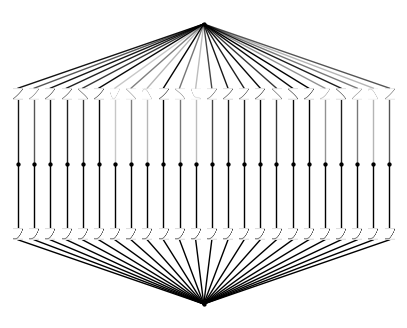

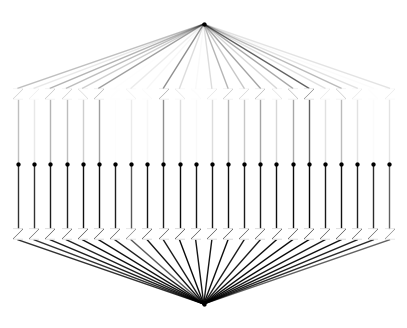

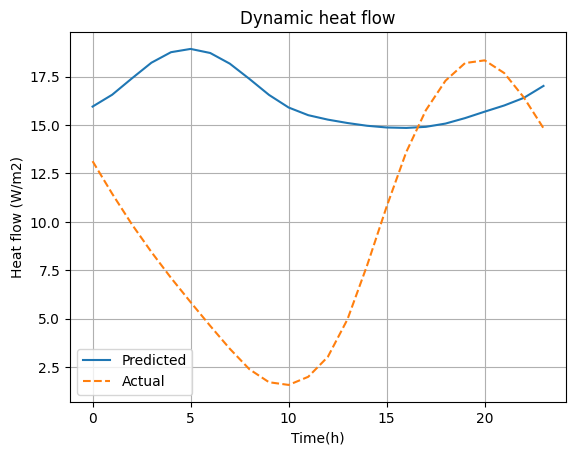

In [3]:
## import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from sympy import symbols, sympify
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from kan import *  # 确保有 kan 模块

x_data_tiled = np.tile(t, 1)
y_data_tiled = np.tile(delta_t_tau, 1)

# Prepare the data
x_data = x_data_tiled
y_data = y_data_tiled

# Normalize the data
x_mean = np.mean(x_data, axis=0)
x_std = np.std(x_data, axis=0) + 1e-8  # Add small constant to avoid division by zero
x_data_norm = (x_data - x_mean) / x_std

y_mean = np.mean(y_data)
y_std = np.std(y_data) + 1e-8  # Add small constant to avoid division by zero
y_data_norm = (y_data - y_mean) / y_std

# Convert to tensors
x_tensor = torch.tensor(x_data_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_data_norm, dtype=torch.float32).unsqueeze(1)

print(x_tensor.shape)
print(y_tensor.shape)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[1, 24, 1], grid=5, k=5, seed=0)  # Input layer now has 1 neuron

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Define early stopping training function with performance evaluation
def train_kan_with_early_stopping(model, dataset, patience=10, steps=10000):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for step in range(steps):
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()
        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')    

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Calculate metrics after training
    with torch.no_grad():
        test_predictions = model(dataset['test_input']).flatten()
        mae, mse, r2 = calculate_metrics(test_predictions, dataset['test_label'], y_std, y_mean)
        print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')



# Train the model with early stopping and learning rate scheduling
train_kan_with_early_stopping(model, dataset, steps=200, patience=10)



#Plot trained KAN
model.plot()
#Automatically set activation functions to be symbolic
# lib = ['x', 'sin', 'exp']
lib = ['sin']
model.auto_symbolic(lib=lib)



#Continue training to almost machine precision
train_kan_with_early_stopping(model, dataset, steps=20000, patience=10)




#Obtain the symbolic formula in terms of normalized data
symbolic_formula_normalized = model.symbolic_formula()[0][0]

# Reverse normalization for symbolic formula using sympy
x_sym = symbols('x')
normalized_formula = sympify(symbolic_formula_normalized)
original_formula = normalized_formula.subs(x_sym, (x_sym * x_std) + x_mean) * y_std + y_mean

print("Discovered Symbolic Formula (Original):")
print(original_formula)

# Plotting and saving results
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

predicted_temperature = model(x_tensor).detach().numpy().flatten() * y_std + y_mean

predicted_heat_gain= 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*predicted_temperature)


x = np.linspace(np.min(x_data), np.max(x_data), num=len(predicted_temperature))
Heat_gain_expanded = np.tile(Heat_gain, 2)[:len(x_data)]

plt.figure()
plt.plot(x, predicted_heat_gain, label='Predicted')
plt.plot(x, Heat_gain_expanded, label='Actual', linestyle='--')
plt.xlabel('Time(h)')
plt.ylabel('Heat flow (W/m2)')
plt.title('Dynamic heat flow')
plt.legend()
plt.grid(True)
# plt.savefig(f'{outputDir}/PredictedTemperatureDistribution.png', dpi=300)
plt.show()



torch.Size([48, 1])
torch.Size([48, 1])
Step [1/200], Val Loss: 0.3383
Step [2/200], Val Loss: 0.3360
Step [3/200], Val Loss: 0.3337
Step [4/200], Val Loss: 0.3315
Step [5/200], Val Loss: 0.3293
Step [6/200], Val Loss: 0.3271
Step [7/200], Val Loss: 0.3250
Step [8/200], Val Loss: 0.3229
Step [9/200], Val Loss: 0.3209
Step [10/200], Val Loss: 0.3189
Step [11/200], Val Loss: 0.3169
Step [12/200], Val Loss: 0.3150
Step [13/200], Val Loss: 0.3132
Step [14/200], Val Loss: 0.3113
Step [15/200], Val Loss: 0.3095
Step [16/200], Val Loss: 0.3077
Step [17/200], Val Loss: 0.3060
Step [18/200], Val Loss: 0.3043
Step [19/200], Val Loss: 0.3026
Step [20/200], Val Loss: 0.3010
Step [21/200], Val Loss: 0.2994
Step [22/200], Val Loss: 0.2978
Step [23/200], Val Loss: 0.2962
Step [24/200], Val Loss: 0.2947
Step [25/200], Val Loss: 0.2932
Step [26/200], Val Loss: 0.2917
Step [27/200], Val Loss: 0.2903
Step [28/200], Val Loss: 0.2888
Step [29/200], Val Loss: 0.2874
Step [30/200], Val Loss: 0.2860
Step [31/

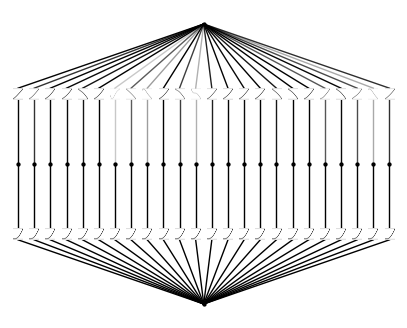

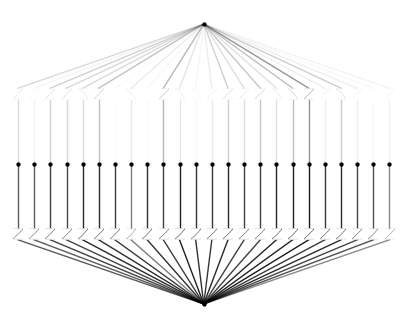

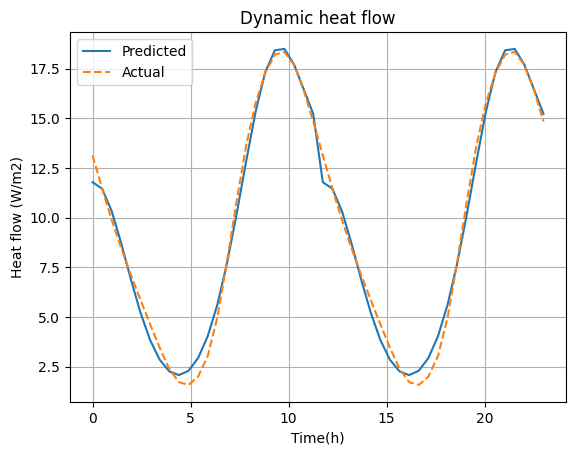

In [8]:
## import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from sympy import symbols, sympify
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from kan import *  # 确保有 kan 模块

N=2

x_data_tiled = np.tile(t, N)
y_data_tiled = np.tile(delta_t_tau, N)

# Prepare the data
x_data = x_data_tiled
y_data = y_data_tiled

# Normalize the data
x_mean = np.mean(x_data, axis=0)
x_std = np.std(x_data, axis=0) + 1e-8  # Add small constant to avoid division by zero
x_data_norm = (x_data - x_mean) / x_std

y_mean = np.mean(y_data)
y_std = np.std(y_data) + 1e-8  # Add small constant to avoid division by zero
y_data_norm = (y_data - y_mean) / y_std

# Convert to tensors
x_tensor = torch.tensor(x_data_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_data_norm, dtype=torch.float32).unsqueeze(1)

print(x_tensor.shape)
print(y_tensor.shape)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[1, 24, 1], grid=5, k=5, seed=0)  # Input layer now has 1 neuron

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Define early stopping training function with performance evaluation
def train_kan_with_early_stopping(model, dataset, patience=10, steps=10000):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for step in range(steps):
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()
        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')    

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Calculate metrics after training
    with torch.no_grad():
        test_predictions = model(dataset['test_input']).flatten()
        mae, mse, r2 = calculate_metrics(test_predictions, dataset['test_label'], y_std, y_mean)
        print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')



# Train the model with early stopping and learning rate scheduling
train_kan_with_early_stopping(model, dataset, steps=200, patience=10)



#Plot trained KAN
model.plot()
#Automatically set activation functions to be symbolic
# lib = ['x', 'sin', 'exp']
lib = ['sin']
model.auto_symbolic(lib=lib)



#Continue training to almost machine precision
train_kan_with_early_stopping(model, dataset, steps=20000, patience=10)




#Obtain the symbolic formula in terms of normalized data
symbolic_formula_normalized = model.symbolic_formula()[0][0]

# Reverse normalization for symbolic formula using sympy
x_sym = symbols('x')
normalized_formula = sympify(symbolic_formula_normalized)
original_formula = normalized_formula.subs(x_sym, (x_sym * x_std) + x_mean) * y_std + y_mean

print("Discovered Symbolic Formula (Original):")
print(original_formula)

# Plotting and saving results
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

predicted_temperature = model(x_tensor).detach().numpy().flatten() * y_std + y_mean

predicted_heat_gain= 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*predicted_temperature)


x = np.linspace(np.min(x_data), np.max(x_data), num=len(predicted_temperature))
Heat_gain_expanded = np.tile(Heat_gain, N)[:len(x_data)]

plt.figure()
plt.plot(x, predicted_heat_gain, label='Predicted')
plt.plot(x, Heat_gain_expanded, label='Actual', linestyle='--')
plt.xlabel('Time(h)')
plt.ylabel('Heat flow (W/m2)')
plt.title('Dynamic heat flow')
plt.legend()
plt.grid(True)
# plt.savefig(f'{outputDir}/PredictedTemperatureDistribution.png', dpi=300)
plt.show()



torch.Size([72, 1])
torch.Size([72, 1])
Step [1/200], Val Loss: 0.6513
Step [2/200], Val Loss: 0.6475
Step [3/200], Val Loss: 0.6438
Step [4/200], Val Loss: 0.6401
Step [5/200], Val Loss: 0.6364
Step [6/200], Val Loss: 0.6328
Step [7/200], Val Loss: 0.6292
Step [8/200], Val Loss: 0.6256
Step [9/200], Val Loss: 0.6220
Step [10/200], Val Loss: 0.6185
Step [11/200], Val Loss: 0.6150
Step [12/200], Val Loss: 0.6115
Step [13/200], Val Loss: 0.6081
Step [14/200], Val Loss: 0.6047
Step [15/200], Val Loss: 0.6013
Step [16/200], Val Loss: 0.5979
Step [17/200], Val Loss: 0.5946
Step [18/200], Val Loss: 0.5913
Step [19/200], Val Loss: 0.5880
Step [20/200], Val Loss: 0.5848
Step [21/200], Val Loss: 0.5815
Step [22/200], Val Loss: 0.5783
Step [23/200], Val Loss: 0.5752
Step [24/200], Val Loss: 0.5720
Step [25/200], Val Loss: 0.5689
Step [26/200], Val Loss: 0.5658
Step [27/200], Val Loss: 0.5627
Step [28/200], Val Loss: 0.5597
Step [29/200], Val Loss: 0.5567
Step [30/200], Val Loss: 0.5537
Step [31/

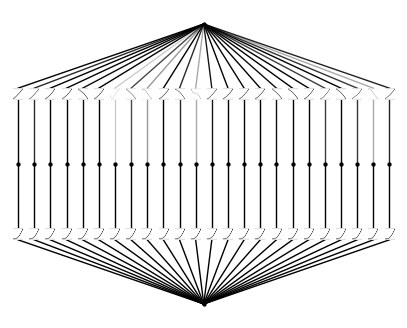

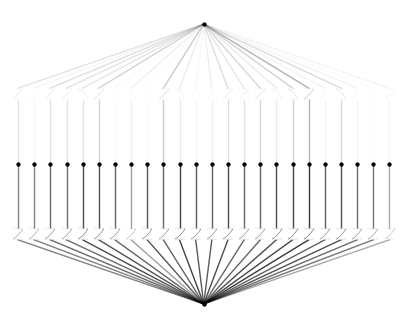

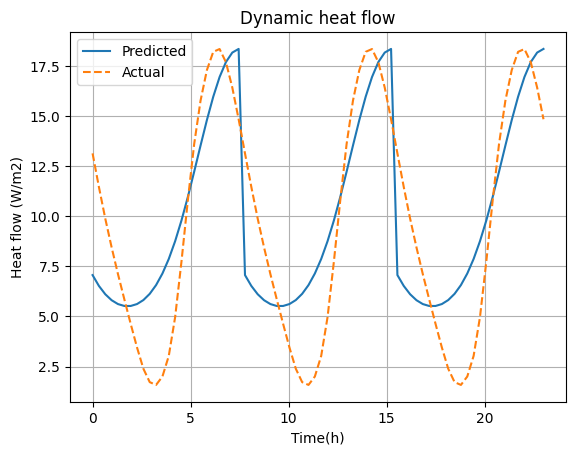

In [6]:
## import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from sympy import symbols, sympify
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from kan import *  # 确保有 kan 模块

N=3

x_data_tiled = np.tile(t, N)
y_data_tiled = np.tile(delta_t_tau, N)

# Prepare the data
x_data = x_data_tiled
y_data = y_data_tiled

# Normalize the data
x_mean = np.mean(x_data, axis=0)
x_std = np.std(x_data, axis=0) + 1e-8  # Add small constant to avoid division by zero
x_data_norm = (x_data - x_mean) / x_std

y_mean = np.mean(y_data)
y_std = np.std(y_data) + 1e-8  # Add small constant to avoid division by zero
y_data_norm = (y_data - y_mean) / y_std

# Convert to tensors
x_tensor = torch.tensor(x_data_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_data_norm, dtype=torch.float32).unsqueeze(1)

print(x_tensor.shape)
print(y_tensor.shape)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[1, 24, 1], grid=5, k=5, seed=0)  # Input layer now has 1 neuron

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Define early stopping training function with performance evaluation
def train_kan_with_early_stopping(model, dataset, patience=10, steps=10000):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for step in range(steps):
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()
        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')    

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Calculate metrics after training
    with torch.no_grad():
        test_predictions = model(dataset['test_input']).flatten()
        mae, mse, r2 = calculate_metrics(test_predictions, dataset['test_label'], y_std, y_mean)
        print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')



# Train the model with early stopping and learning rate scheduling
train_kan_with_early_stopping(model, dataset, steps=200, patience=10)



#Plot trained KAN
model.plot()
#Automatically set activation functions to be symbolic
# lib = ['x', 'sin', 'exp']
lib = ['sin']
model.auto_symbolic(lib=lib)



#Continue training to almost machine precision
train_kan_with_early_stopping(model, dataset, steps=20000, patience=10)




#Obtain the symbolic formula in terms of normalized data
symbolic_formula_normalized = model.symbolic_formula()[0][0]

# Reverse normalization for symbolic formula using sympy
x_sym = symbols('x')
normalized_formula = sympify(symbolic_formula_normalized)
original_formula = normalized_formula.subs(x_sym, (x_sym * x_std) + x_mean) * y_std + y_mean

print("Discovered Symbolic Formula (Original):")
print(original_formula)

# Plotting and saving results
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

predicted_temperature = model(x_tensor).detach().numpy().flatten() * y_std + y_mean

predicted_heat_gain= 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*predicted_temperature)


x = np.linspace(np.min(x_data), np.max(x_data), num=len(predicted_temperature))
Heat_gain_expanded = np.tile(Heat_gain, N)[:len(x_data)]

plt.figure()
plt.plot(x, predicted_heat_gain, label='Predicted')
plt.plot(x, Heat_gain_expanded, label='Actual', linestyle='--')
plt.xlabel('Time(h)')
plt.ylabel('Heat flow (W/m2)')
plt.title('Dynamic heat flow')
plt.legend()
plt.grid(True)
# plt.savefig(f'{outputDir}/PredictedTemperatureDistribution.png', dpi=300)
plt.show()



torch.Size([96, 1])
torch.Size([96, 1])
Step [1/200], Val Loss: 0.6014
Step [2/200], Val Loss: 0.5978
Step [3/200], Val Loss: 0.5943
Step [4/200], Val Loss: 0.5908
Step [5/200], Val Loss: 0.5873
Step [6/200], Val Loss: 0.5838
Step [7/200], Val Loss: 0.5803
Step [8/200], Val Loss: 0.5769
Step [9/200], Val Loss: 0.5735
Step [10/200], Val Loss: 0.5701
Step [11/200], Val Loss: 0.5668
Step [12/200], Val Loss: 0.5635
Step [13/200], Val Loss: 0.5602
Step [14/200], Val Loss: 0.5569
Step [15/200], Val Loss: 0.5537
Step [16/200], Val Loss: 0.5504
Step [17/200], Val Loss: 0.5473
Step [18/200], Val Loss: 0.5441
Step [19/200], Val Loss: 0.5409
Step [20/200], Val Loss: 0.5378
Step [21/200], Val Loss: 0.5347
Step [22/200], Val Loss: 0.5317
Step [23/200], Val Loss: 0.5286
Step [24/200], Val Loss: 0.5256
Step [25/200], Val Loss: 0.5226
Step [26/200], Val Loss: 0.5197
Step [27/200], Val Loss: 0.5167
Step [28/200], Val Loss: 0.5138
Step [29/200], Val Loss: 0.5109
Step [30/200], Val Loss: 0.5080
Step [31/

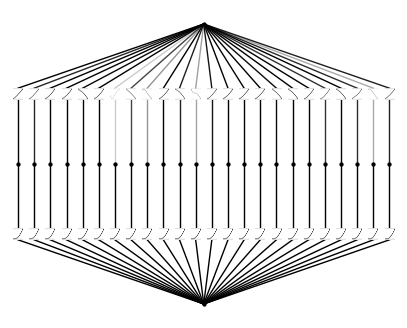

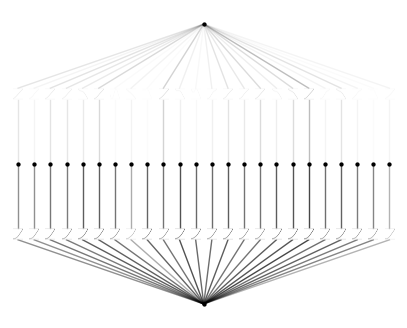

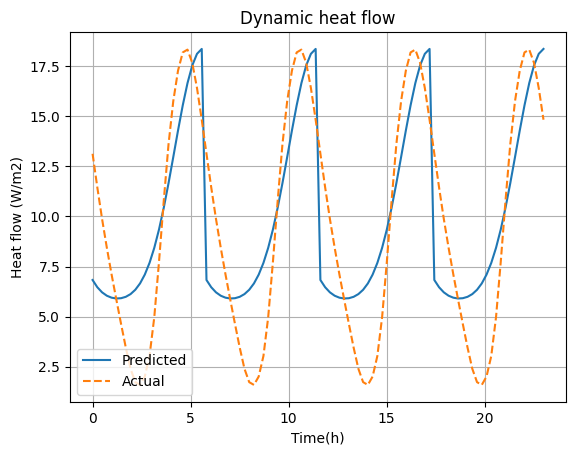

In [7]:
## import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from sympy import symbols, sympify
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from kan import *  # 确保有 kan 模块

N=4

x_data_tiled = np.tile(t, N)
y_data_tiled = np.tile(delta_t_tau, N)

# Prepare the data
x_data = x_data_tiled
y_data = y_data_tiled

# Normalize the data
x_mean = np.mean(x_data, axis=0)
x_std = np.std(x_data, axis=0) + 1e-8  # Add small constant to avoid division by zero
x_data_norm = (x_data - x_mean) / x_std

y_mean = np.mean(y_data)
y_std = np.std(y_data) + 1e-8  # Add small constant to avoid division by zero
y_data_norm = (y_data - y_mean) / y_std

# Convert to tensors
x_tensor = torch.tensor(x_data_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_data_norm, dtype=torch.float32).unsqueeze(1)

print(x_tensor.shape)
print(y_tensor.shape)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[1, 24, 1], grid=5, k=5, seed=0)  # Input layer now has 1 neuron

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Define early stopping training function with performance evaluation
def train_kan_with_early_stopping(model, dataset, patience=10, steps=10000):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for step in range(steps):
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()
        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')    

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Calculate metrics after training
    with torch.no_grad():
        test_predictions = model(dataset['test_input']).flatten()
        mae, mse, r2 = calculate_metrics(test_predictions, dataset['test_label'], y_std, y_mean)
        print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')



# Train the model with early stopping and learning rate scheduling
train_kan_with_early_stopping(model, dataset, steps=200, patience=10)



#Plot trained KAN
model.plot()
#Automatically set activation functions to be symbolic
# lib = ['x', 'sin', 'exp']
lib = ['sin']
model.auto_symbolic(lib=lib)



#Continue training to almost machine precision
train_kan_with_early_stopping(model, dataset, steps=20000, patience=10)




#Obtain the symbolic formula in terms of normalized data
symbolic_formula_normalized = model.symbolic_formula()[0][0]

# Reverse normalization for symbolic formula using sympy
x_sym = symbols('x')
normalized_formula = sympify(symbolic_formula_normalized)
original_formula = normalized_formula.subs(x_sym, (x_sym * x_std) + x_mean) * y_std + y_mean

print("Discovered Symbolic Formula (Original):")
print(original_formula)

# Plotting and saving results
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

predicted_temperature = model(x_tensor).detach().numpy().flatten() * y_std + y_mean

predicted_heat_gain= 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*predicted_temperature)


x = np.linspace(np.min(x_data), np.max(x_data), num=len(predicted_temperature))
Heat_gain_expanded = np.tile(Heat_gain, N)[:len(x_data)]

plt.figure()
plt.plot(x, predicted_heat_gain, label='Predicted')
plt.plot(x, Heat_gain_expanded, label='Actual', linestyle='--')
plt.xlabel('Time(h)')
plt.ylabel('Heat flow (W/m2)')
plt.title('Dynamic heat flow')
plt.legend()
plt.grid(True)
# plt.savefig(f'{outputDir}/PredictedTemperatureDistribution.png', dpi=300)
plt.show()



torch.Size([120, 1])
torch.Size([120, 1])
Step [1/200], Val Loss: 0.5518
Step [2/200], Val Loss: 0.5492
Step [3/200], Val Loss: 0.5466
Step [4/200], Val Loss: 0.5440
Step [5/200], Val Loss: 0.5414
Step [6/200], Val Loss: 0.5389
Step [7/200], Val Loss: 0.5364
Step [8/200], Val Loss: 0.5339
Step [9/200], Val Loss: 0.5314
Step [10/200], Val Loss: 0.5289
Step [11/200], Val Loss: 0.5265
Step [12/200], Val Loss: 0.5241
Step [13/200], Val Loss: 0.5217
Step [14/200], Val Loss: 0.5193
Step [15/200], Val Loss: 0.5170
Step [16/200], Val Loss: 0.5146
Step [17/200], Val Loss: 0.5123
Step [18/200], Val Loss: 0.5100
Step [19/200], Val Loss: 0.5078
Step [20/200], Val Loss: 0.5055
Step [21/200], Val Loss: 0.5033
Step [22/200], Val Loss: 0.5011
Step [23/200], Val Loss: 0.4989
Step [24/200], Val Loss: 0.4967
Step [25/200], Val Loss: 0.4946
Step [26/200], Val Loss: 0.4925
Step [27/200], Val Loss: 0.4904
Step [28/200], Val Loss: 0.4883
Step [29/200], Val Loss: 0.4862
Step [30/200], Val Loss: 0.4842
Step [3

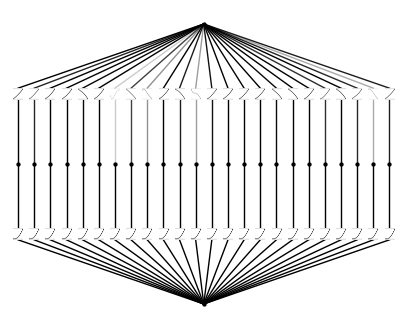

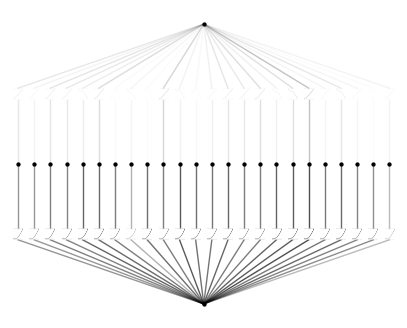

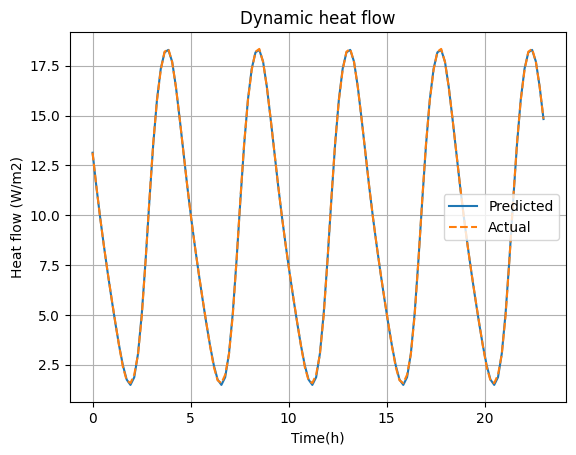

In [9]:
## import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from sympy import symbols, sympify
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from kan import *  # 确保有 kan 模块

N=5

x_data_tiled = np.tile(t, N)
y_data_tiled = np.tile(delta_t_tau, N)

# Prepare the data
x_data = x_data_tiled
y_data = y_data_tiled

# Normalize the data
x_mean = np.mean(x_data, axis=0)
x_std = np.std(x_data, axis=0) + 1e-8  # Add small constant to avoid division by zero
x_data_norm = (x_data - x_mean) / x_std

y_mean = np.mean(y_data)
y_std = np.std(y_data) + 1e-8  # Add small constant to avoid division by zero
y_data_norm = (y_data - y_mean) / y_std

# Convert to tensors
x_tensor = torch.tensor(x_data_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_data_norm, dtype=torch.float32).unsqueeze(1)

print(x_tensor.shape)
print(y_tensor.shape)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[1, 24, 1], grid=5, k=5, seed=0)  # Input layer now has 1 neuron

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Define early stopping training function with performance evaluation
def train_kan_with_early_stopping(model, dataset, patience=10, steps=10000):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for step in range(steps):
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()
        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')    

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Calculate metrics after training
    with torch.no_grad():
        test_predictions = model(dataset['test_input']).flatten()
        mae, mse, r2 = calculate_metrics(test_predictions, dataset['test_label'], y_std, y_mean)
        print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')



# Train the model with early stopping and learning rate scheduling
train_kan_with_early_stopping(model, dataset, steps=200, patience=10)



#Plot trained KAN
model.plot()
#Automatically set activation functions to be symbolic
# lib = ['x', 'sin', 'exp']
lib = ['sin']
model.auto_symbolic(lib=lib)



#Continue training to almost machine precision
train_kan_with_early_stopping(model, dataset, steps=20000, patience=10)




#Obtain the symbolic formula in terms of normalized data
symbolic_formula_normalized = model.symbolic_formula()[0][0]

# Reverse normalization for symbolic formula using sympy
x_sym = symbols('x')
normalized_formula = sympify(symbolic_formula_normalized)
original_formula = normalized_formula.subs(x_sym, (x_sym * x_std) + x_mean) * y_std + y_mean

print("Discovered Symbolic Formula (Original):")
print(original_formula)

# Plotting and saving results
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

predicted_temperature = model(x_tensor).detach().numpy().flatten() * y_std + y_mean

predicted_heat_gain= 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*predicted_temperature)


x = np.linspace(np.min(x_data), np.max(x_data), num=len(predicted_temperature))
Heat_gain_expanded = np.tile(Heat_gain, N)[:len(x_data)]

plt.figure()
plt.plot(x, predicted_heat_gain, label='Predicted')
plt.plot(x, Heat_gain_expanded, label='Actual', linestyle='--')
plt.xlabel('Time(h)')
plt.ylabel('Heat flow (W/m2)')
plt.title('Dynamic heat flow')
plt.legend()
plt.grid(True)
# plt.savefig(f'{outputDir}/PredictedTemperatureDistribution.png', dpi=300)
plt.show()



torch.Size([144, 1])
torch.Size([144, 1])
Step [1/200], Val Loss: 0.5519
Step [2/200], Val Loss: 0.5488
Step [3/200], Val Loss: 0.5458
Step [4/200], Val Loss: 0.5427
Step [5/200], Val Loss: 0.5397
Step [6/200], Val Loss: 0.5367
Step [7/200], Val Loss: 0.5338
Step [8/200], Val Loss: 0.5309
Step [9/200], Val Loss: 0.5280
Step [10/200], Val Loss: 0.5251
Step [11/200], Val Loss: 0.5223
Step [12/200], Val Loss: 0.5194
Step [13/200], Val Loss: 0.5167
Step [14/200], Val Loss: 0.5139
Step [15/200], Val Loss: 0.5112
Step [16/200], Val Loss: 0.5085
Step [17/200], Val Loss: 0.5058
Step [18/200], Val Loss: 0.5031
Step [19/200], Val Loss: 0.5005
Step [20/200], Val Loss: 0.4979
Step [21/200], Val Loss: 0.4953
Step [22/200], Val Loss: 0.4928
Step [23/200], Val Loss: 0.4903
Step [24/200], Val Loss: 0.4878
Step [25/200], Val Loss: 0.4853
Step [26/200], Val Loss: 0.4829
Step [27/200], Val Loss: 0.4804
Step [28/200], Val Loss: 0.4780
Step [29/200], Val Loss: 0.4757
Step [30/200], Val Loss: 0.4733
Step [3

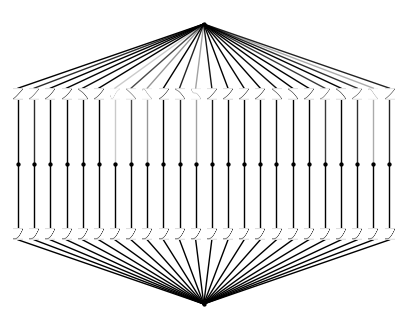

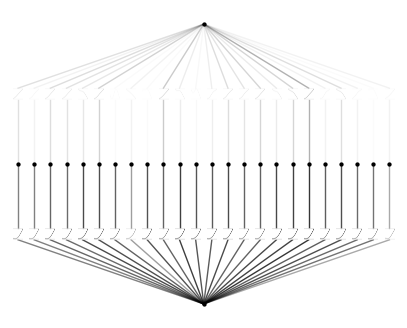

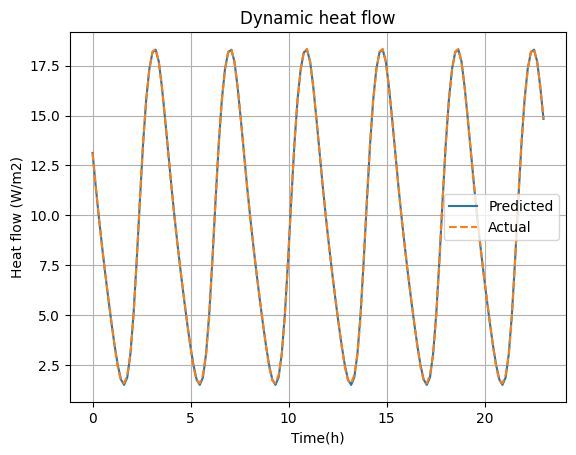

In [10]:
## import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
from sympy import symbols, sympify
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from kan import *  # 确保有 kan 模块

N=6

x_data_tiled = np.tile(t, N)
y_data_tiled = np.tile(delta_t_tau, N)

# Prepare the data
x_data = x_data_tiled
y_data = y_data_tiled

# Normalize the data
x_mean = np.mean(x_data, axis=0)
x_std = np.std(x_data, axis=0) + 1e-8  # Add small constant to avoid division by zero
x_data_norm = (x_data - x_mean) / x_std

y_mean = np.mean(y_data)
y_std = np.std(y_data) + 1e-8  # Add small constant to avoid division by zero
y_data_norm = (y_data - y_mean) / y_std

# Convert to tensors
x_tensor = torch.tensor(x_data_norm, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_data_norm, dtype=torch.float32).unsqueeze(1)

print(x_tensor.shape)
print(y_tensor.shape)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[1, 24, 1], grid=5, k=5, seed=0)  # Input layer now has 1 neuron

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Define early stopping training function with performance evaluation
def train_kan_with_early_stopping(model, dataset, patience=10, steps=10000):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for step in range(steps):
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()
        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')    

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Calculate metrics after training
    with torch.no_grad():
        test_predictions = model(dataset['test_input']).flatten()
        mae, mse, r2 = calculate_metrics(test_predictions, dataset['test_label'], y_std, y_mean)
        print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')



# Train the model with early stopping and learning rate scheduling
train_kan_with_early_stopping(model, dataset, steps=200, patience=10)



#Plot trained KAN
model.plot()
#Automatically set activation functions to be symbolic
# lib = ['x', 'sin', 'exp']
lib = ['sin']
model.auto_symbolic(lib=lib)



#Continue training to almost machine precision
train_kan_with_early_stopping(model, dataset, steps=20000, patience=10)




#Obtain the symbolic formula in terms of normalized data
symbolic_formula_normalized = model.symbolic_formula()[0][0]

# Reverse normalization for symbolic formula using sympy
x_sym = symbols('x')
normalized_formula = sympify(symbolic_formula_normalized)
original_formula = normalized_formula.subs(x_sym, (x_sym * x_std) + x_mean) * y_std + y_mean

print("Discovered Symbolic Formula (Original):")
print(original_formula)

# Plotting and saving results
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

predicted_temperature = model(x_tensor).detach().numpy().flatten() * y_std + y_mean

predicted_heat_gain= 2.201880370763735*(mean_temperature -24 + 8.7/2.201880370763735*predicted_temperature)


x = np.linspace(np.min(x_data), np.max(x_data), num=len(predicted_temperature))
Heat_gain_expanded = np.tile(Heat_gain, N)[:len(x_data)]

plt.figure()
plt.plot(x, predicted_heat_gain, label='Predicted')
plt.plot(x, Heat_gain_expanded, label='Actual', linestyle='--')
plt.xlabel('Time(h)')
plt.ylabel('Heat flow (W/m2)')
plt.title('Dynamic heat flow')
plt.legend()
plt.grid(True)
# plt.savefig(f'{outputDir}/PredictedTemperatureDistribution.png', dpi=300)
plt.show()

